In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

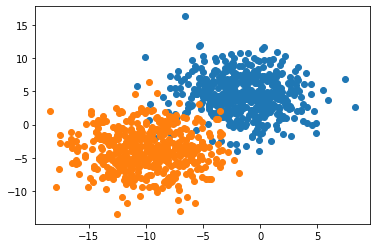

In [2]:
# generate binary classification dataset and plot
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [3]:
# example of fitting and evaluating a model on the classification dataset
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# evaluate the predictions
acc = accuracy_score(y, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.972


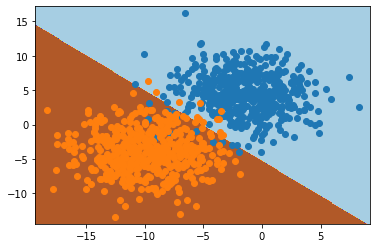

In [4]:
# decision surface for logistic regression on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = where(y == class_value)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()